In [ ]:
!nvidia-smi

Wed Apr  6 20:26:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Importing all the required libraries**

In [ ]:
#Import all the required libraries


import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import tensorflow as tf
import keras
from keras.preprocessing.image import load_img
import string
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from PIL import Image

#used for creating Progress Meters or Progress Bars
from tqdm import tqdm

We need to install the below libraries before proceeding :

gTTS - (Google Text-to-Speech)is a Python library and CLI tool to interface with Google Translate text-to-speech API. We will import the gTTS library from the gtts module which can be used for speech translation.

playsound - The playsound module is a cross platform module that can play audio files. This doesn't have any dependencies, simply install with pip in your virtualenv and run!

display - Public API for display tools in IPython

In [ ]:
# Install additional libraries required

!pip install wordcloud
!pip install gtts
!pip install playsound

  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=df94ae63bdbb049d5f6efc9ff874f196093068f5f30a06bbed4eca277adeb6f3
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
import glob
from gtts import gTTS
from playsound import playsound
from IPython import display

import collections
import wordcloud
from wordcloud import WordCloud, STOPWORDS

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


# **Reading Dataset**

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']="/content/"

In [ ]:
!kaggle datasets download adityajn105/flickr8k

 98% 1.02G/1.04G [00:06<00:00, 144MB/s]
100% 1.04G/1.04G [00:06<00:00, 166MB/s]


In [ ]:
import zipfile
! unzip "flickr8k.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: Images/2844846111_8c1cbfc75d.jpg  
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed

In [ ]:
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/Images/3126981064_1e803c3d7f.jpg
/content/Images/2458006588_754c4aa09c.jpg
/content/Images/1244140539_da4804d828.jpg
/content/Images/97105139_fae46fe8ef.jpg
/content/Images/3690425778_3b390b3ea5.jpg
/content/Images/3266399073_40820596d5.jpg
/content/Images/3297272270_285b8878b2.jpg
/content/Images/3154813159_58a195236d.jpg
/content/Images/475778645_65b7343c47.jpg
/content/Images/2856080862_95d793fa9d.jpg
/content/Images/2284894733_b710b9b106.jpg
/content/Images/2642350864_099c0f2152.jpg
/content/Images/3282897060_8c584e2ce8.jpg
/content/Images/3495490064_8db40a83af.jpg
/content/Images/2247889670_413db8094b.jpg
/content/Images/2561341745_2d77d3ff7d.jpg
/content/Images/3327563443_870a33f748.jpg
/content/Images/2980348138_91cc6f6d0f.jpg
/content/Images/2922973230_5a769ef92a.jpg
/content/Images/426805536_d1d5e68c17.jpg
/content/Images/2896668718_0c3cff910f.jpg
/content/Images/3018467501_a03d404413.jpg
/content/Images/3599124739_b7

# **Data Understanding and Visualization**

1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions

In [ ]:
#Import the dataset and read the image into a seperate variable

images='/content/Images'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


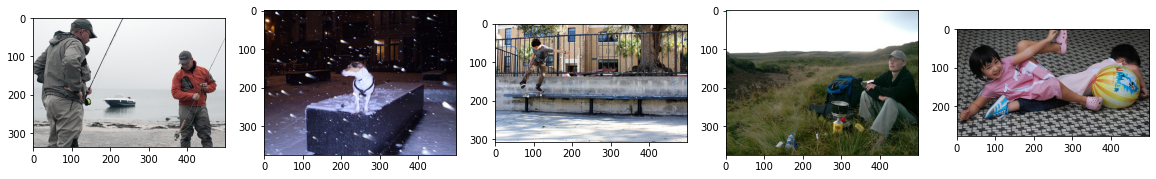

In [ ]:
#Visualise both the images & text present in the dataset
import imageio

#Visualising first 5 images :

Display_Images = all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)

for ax, image in zip(axes, Display_Images):
  ax.imshow(imageio.imread(image), cmap=None)

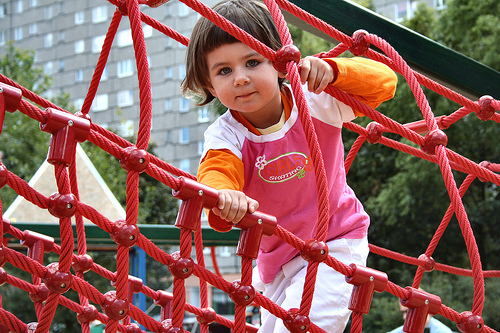

In [ ]:
# view a random image

import random
Image.open(all_imgs[random.randrange(40, 60, 3)])

In [ ]:
#Import the dataset and read the text file into a separate variable
text_file = '/content/captions.txt'

def load_doc(filename):
    
    open_file = open(text_file, 'r', encoding='latin-1' ) #returns a file object
    text = open_file.read() #reads contents of the file
    open_file.close()
    #print(text)
    
    return text

doc = load_doc(text_file)
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


Creating a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

We will create three lists here and finally combine them to form a dataframe

all_img_id = [] to store all the image id 

all_img_vector = [] to store all the image path 

annotations = []  to store all the captions 

In [ ]:
img_path = '/content/Images/'

all_img_id = [] #store all the image id here
all_img_vector = [] #store all the image path here
annotations = [] #store all the captions here

with open('/content/captions.txt' , 'r') as fo:
  next(fo) #to skip the heading
  for line in fo :
    split_arr = line.split(',')
    all_img_id.append(split_arr[0])
    annotations.append(split_arr[1].rstrip('\n.')) #removing out the \n.
    all_img_vector.append(img_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

ID                                       Path  \
0      1000268201_693b08cb0e.jpg  /content/Images/1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg  /content/Images/1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg  /content/Images/1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg  /content/Images/1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg  /content/Images/1000268201_693b08cb0e.jpg   
...                          ...                                        ...   
40450   997722733_0cb5439472.jpg   /content/Images/997722733_0cb5439472.jpg   
40451   997722733_0cb5439472.jpg   /content/Images/997722733_0cb5439472.jpg   
40452   997722733_0cb5439472.jpg   /content/Images/997722733_0cb5439472.jpg   
40453   997722733_0cb5439472.jpg   /content/Images/997722733_0cb5439472.jpg   
40454   997722733_0cb5439472.jpg   /content/Images/997722733_0cb5439472.jpg   

                                                Captions  
0      A child in a pink dress is climbing up a set o...  
1                   A girl going into a wooden building   
2        A little girl climbing into a wooden playhouse   
3      A little girl climbing the stairs to her playh...  
4      A little girl in a pink dress going into a woo...  
...                                                  ...  
40450           A man in a pink shirt climbs a rock face  
40451            A man is rock climbing high in the air   
40452  A person in a red shirt climbing up a rock fac...  
40453                     A rock climber in a red shirt   
40454  A rock climber practices on a rock climbing wall   

[40455 rows x 3 columns]

In [ ]:
len (annotations)

40455

In [ ]:
type (annotations)

list

In [ ]:
#check total captions and images present in dataset

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_imgs)))

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [ ]:
#Create the vocabulary & the counter for the captions
#lower() used to ensure same count irrespective of an alphabet's case

vocabulary = [word.lower() for line in annotations for word in line.split()]

val_count = Counter(vocabulary) 
val_count

Counter({'a': 60196,
         'child': 1507,
         'in': 18174,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6495,
         'stairs': 109,
         'an': 2325,
         'entry': 1,
         'way': 48,
         'girl': 3277,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1736,
         'playhouse': 6,
         'the': 17507,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3620,
         'dog': 7948,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7304,
         'each': 399,
         'other': 667,
         'on': 10357,
         'road': 380,
         'white': 3706,
         'brown': 2457,
         'spots': 28,
         'staring': 57,
         'at': 2810,
         'stree

**2.5 Visualise the top 30 occuring words in the captions**

a :  60196
in :  18174
the :  17507
on :  10357
is :  9069
and :  8057
dog :  7948
with :  7304
man :  7137
of :  6495
two :  5132
white :  3706
black :  3620
boy :  3514
are :  3365
woman :  3304
girl :  3277
to :  3005
wearing :  2916
people :  2811
at :  2810
water :  2676
young :  2587
red :  2553
brown :  2457
an :  2325
his :  2255
blue :  2125
dogs :  2095
running :  1996


Text(0, 0.5, 'Count')

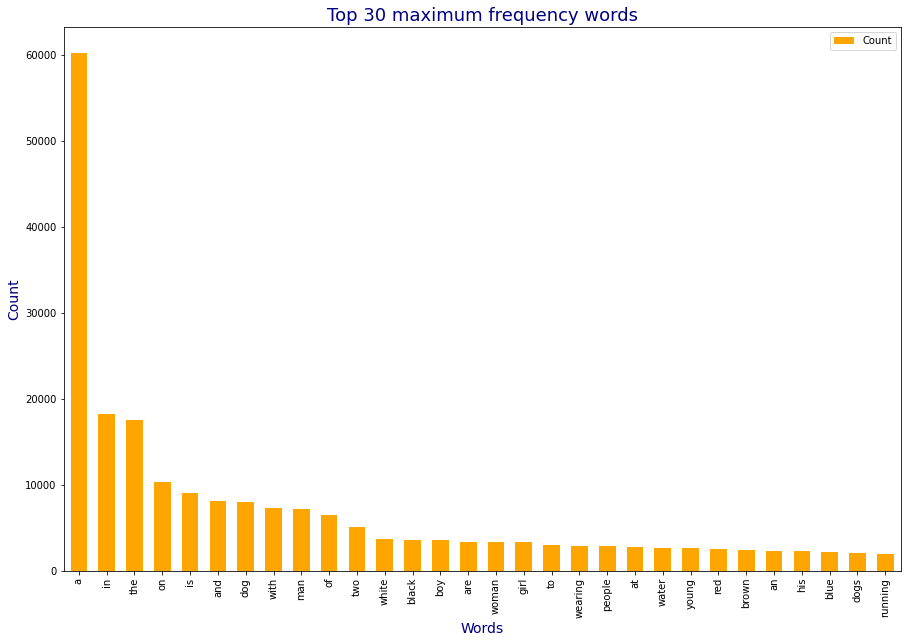

In [ ]:
#Visualise the top 30 occuring words in the captions

#write your code here
for word, count in val_count.most_common(30):
  print(word, ": ", count)

lst = val_count.most_common(30)
most_common_words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word', y='Count', width=0.6, color='orange', figsize=(15, 10))
plt.title("Top 30 maximum frequency words", fontsize = 18, color= 'navy')
plt.xlabel("Words", fontsize = 14, color= 'navy')
plt.ylabel("Count", fontsize = 14, color= 'navy')

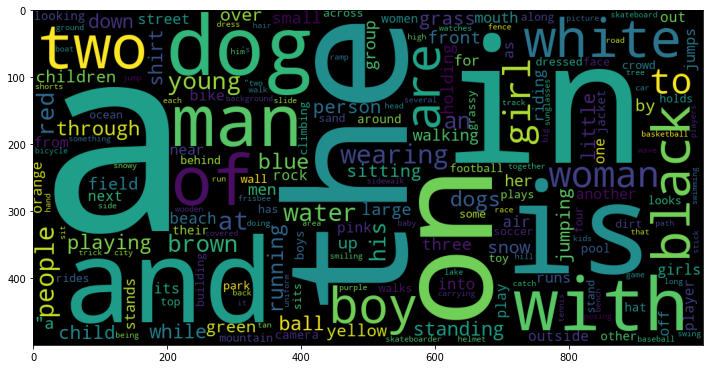

In [ ]:
## check out the top 30 words with higher frequency

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(val_count)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

**Visualize the images and captions together**

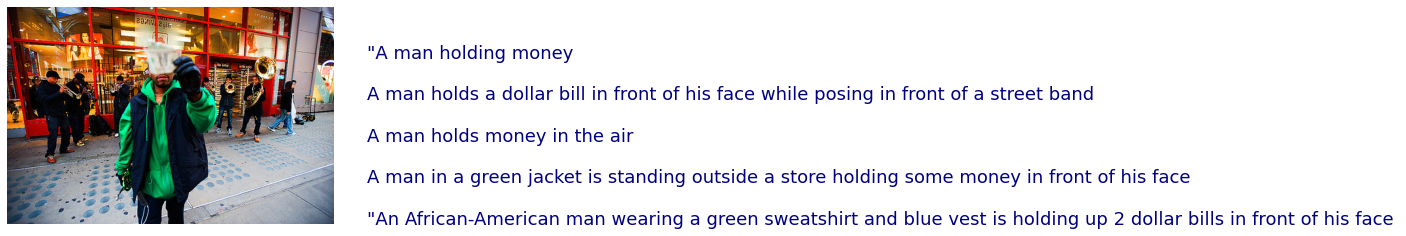

In [ ]:
def caption_with_img_plot(image_id, frame) :
  #get the captions
  capt = ("\n" *2).join(frame[frame['ID'] == image_id].Captions.to_list())
  fig, ax = plt.subplots()
  ax.set_axis_off()
  idx = df.ID.to_list().index(image_id)
  im =  Image.open(df.Path.iloc[idx])
  w, h = im.size[0], im.size[-1]
  ax.imshow(im)
  ax.text(w+50, h, capt, fontsize = 18, color = 'navy')
caption_with_img_plot(df.ID.iloc[8049], df)


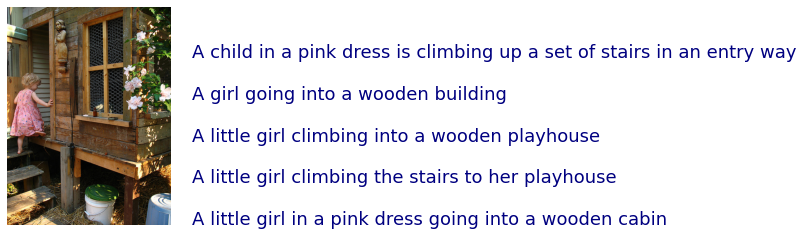

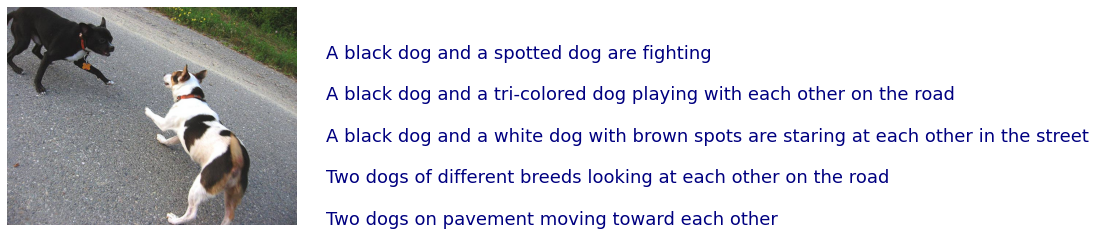

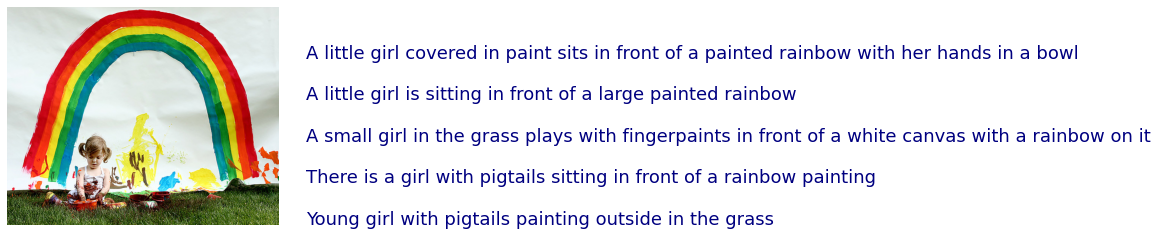

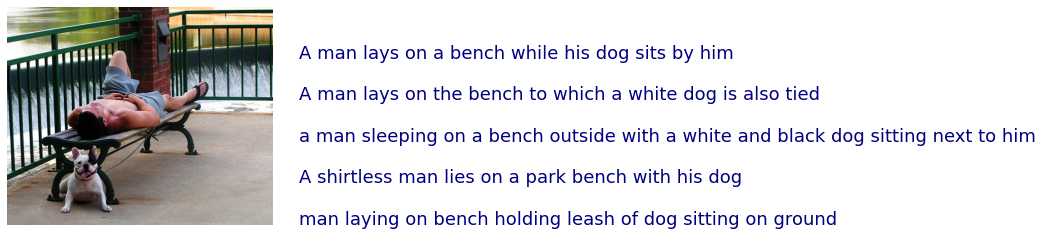

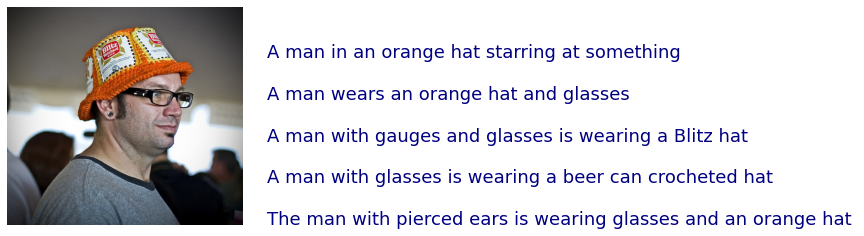

In [ ]:
def execute_img_capt(start, end, frame) :
  for r in range(start, end) :
    caption_with_img_plot(frame.ID.drop_duplicates().iloc[r], frame)

execute_img_capt(0, 5, df)  

**3. Clean Data**

In [ ]:
#data cleaning
rem_punct = str.maketrans('', '', string.punctuation)
for r in range(len(annotations)) :
  line = annotations[r]
  line = line.split()

  # converting to lowercase
  line = [word.lower() for word in line]

  # remove punctuation from each caption and hanging letters
  line = [word.translate(rem_punct) for word in line]
  line = [word for word in line if len(word) > 1]

  # remove numeric values
  line = [word for word in line if word.isalpha()]

  annotations[r] = ' '.join(line)

In [ ]:
#add the <start> & <end> token to all those captions as well
annotations = ['<start>' + ' ' + line + ' ' + '<end>' for line in annotations]

#Create a list which contains all the path to the images
all_img_path = all_img_vector

In [ ]:
##list contatining captions for an image
annotations[0:5]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

**4. Data Preprocessing**

**4.1 Captions Preprocessing**

In [ ]:
# create the tokenizer

top_word_cnt = 5000
tokenizer = Tokenizer(num_words = top_word_cnt+1, filters= '!"#$%^&*()_+.,:;-?/~`{}[]|\=@ ',
                      lower = True, char_level = False, 
                      oov_token = 'UNK')

In [ ]:
# Create word-to-index and index-to-word mappings.

tokenizer.fit_on_texts(annotations)

#transform each text into a sequence of integers
train_seqs = tokenizer.texts_to_sequences(annotations)

In [ ]:
# we add PAD token for zero

tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'

In [ ]:
print(tokenizer.oov_token)
print(tokenizer.index_word[0])

UNK
PAD


**View index words**

In [ ]:
#Words are assigned indexes
tokenizer.index_word


{1: 'UNK',
 2: '<start>',
 3: '<end>',
 4: 'in',
 5: 'the',
 6: 'on',
 7: 'is',
 8: 'and',
 9: 'dog',
 10: 'with',
 11: 'man',
 12: 'of',
 13: 'two',
 14: 'white',
 15: 'black',
 16: 'boy',
 17: 'are',
 18: 'woman',
 19: 'girl',
 20: 'to',
 21: 'wearing',
 22: 'people',
 23: 'at',
 24: 'water',
 25: 'young',
 26: 'red',
 27: 'brown',
 28: 'an',
 29: 'his',
 30: 'blue',
 31: 'dogs',
 32: 'running',
 33: 'through',
 34: 'playing',
 35: 'while',
 36: 'down',
 37: 'little',
 38: 'shirt',
 39: 'standing',
 40: 'ball',
 41: 'grass',
 42: 'person',
 43: 'child',
 44: 'snow',
 45: 'jumping',
 46: 'over',
 47: 'three',
 48: 'front',
 49: 'sitting',
 50: 'small',
 51: 'field',
 52: 'up',
 53: 'holding',
 54: 'large',
 55: 'group',
 56: 'by',
 57: 'green',
 58: 'yellow',
 59: 'children',
 60: 'walking',
 61: 'men',
 62: 'her',
 63: 'into',
 64: 'beach',
 65: 'air',
 66: 'near',
 67: 'jumps',
 68: 'mouth',
 69: 'street',
 70: 'runs',
 71: 'for',
 72: 'another',
 73: 'riding',
 74: 'from',
 75: 'it

In [ ]:
# Create a word count of your tokenizer to visualize the Top 30 occuring words after text processing
tokenizer_top_words = [word for line in annotations for word in line.split() ]

#tokenizer_top_words_count
tokenizer_top_words_count = collections.Counter(tokenizer_top_words)
tokenizer_top_words_count

Counter({'<start>': 40455,
         'child': 1517,
         'in': 18182,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6496,
         'stairs': 109,
         'an': 2358,
         'entry': 1,
         'way': 48,
         '<end>': 40455,
         'girl': 3284,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1750,
         'playhouse': 6,
         'the': 17676,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3627,
         'dog': 7956,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tricolored': 12,
         'playing': 1954,
         'with': 7308,
         'each': 399,
         'other': 667,
         'on': 10367,
         'road': 380,
         'white': 3710,
         'brown': 2471,
         'spots': 28,
         'staring': 57,
      

<start> :  40455
<end> :  40455
in :  18182
the :  17676
on :  10367
is :  9069
and :  8057
dog :  7956
with :  7308
man :  7164
of :  6496
two :  5546
white :  3710
black :  3627
boy :  3534
are :  3365
woman :  3320
girl :  3284
to :  3005
wearing :  2917
people :  2837
at :  2819
water :  2676
young :  2610
red :  2553
brown :  2471
an :  2358
his :  2255
blue :  2125
dogs :  2097


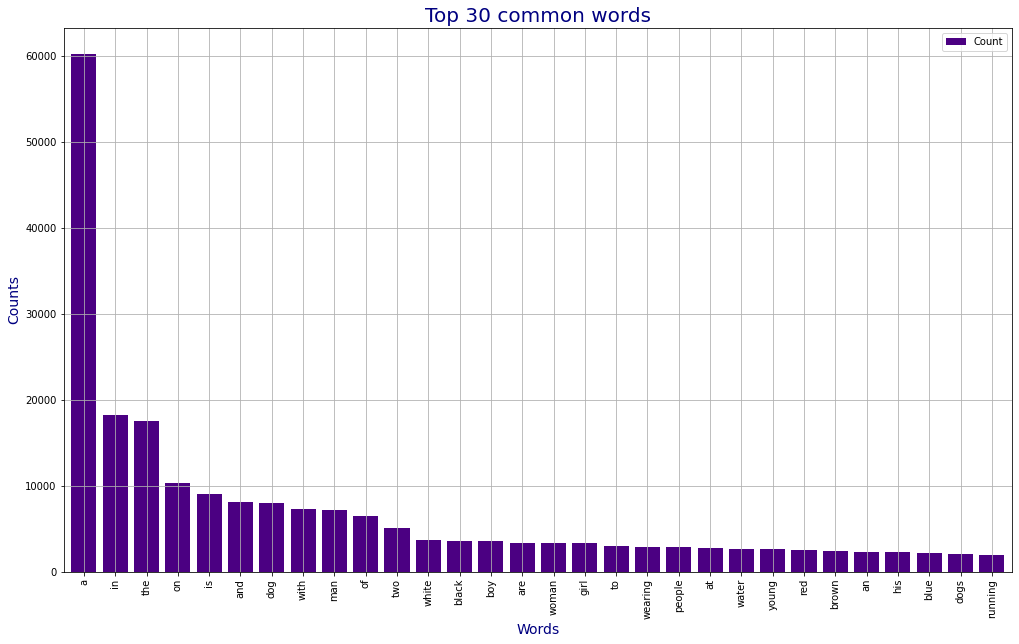

In [ ]:
for word, count in tokenizer_top_words_count.most_common(30) :
  print(word, ": ", count)

tokens = tokenizer_top_words_count.most_common(30)
most_com_words_df = pd.DataFrame(tokens, columns = ['Word', 'Count'])

#plot 30 most common words
most_common_words_df.plot.bar(x = 'Word', y= 'Count', width=0.8, color = 'indigo', figsize = (17, 10))
plt.title('Top 30 common words', fontsize =20, color= 'navy')
plt.xlabel('Words', fontsize =14, color= 'navy')
plt.ylabel('Counts', fontsize =14, color= 'navy')
plt.grid(b=None)

**Let's view the frequency of words now, post Captions preprocessing**

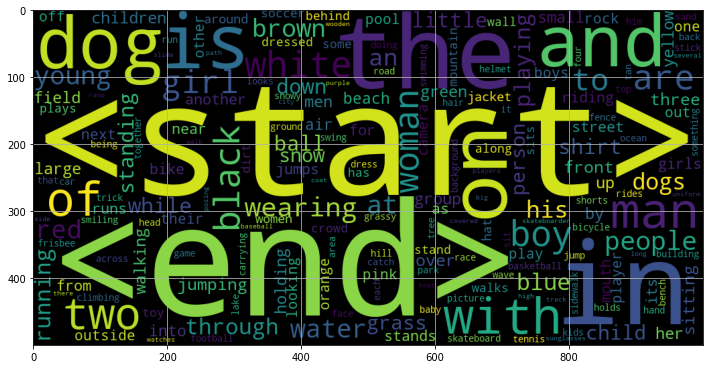

In [ ]:
wordcloud_token = WordCloud(width = 1000, height = 500).generate_from_frequencies(tokenizer_top_words_count)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud_token)
plt.grid(b = None)

In [ ]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

#store the length of all lists
train_seqs_len = [len(seq) for seq in train_seqs]

#store elements from list with maximum value
longest_word_length = max(train_seqs_len)

#calculate longest word_length and pads all sequences to equal length as that of the longest.
cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding= 'post', maxlen = longest_word_length,
                                                          dtype='int32', value=0)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 31)


**4.2 Pre-processing the images**

In [ ]:
# creating list to store preprocessed images and setting up the Image Shape

preprocessed_image = []
IMAGE_SHAPE = (299, 299)

In [ ]:
#checking image format 

tf.keras.backend.image_data_format()

'channels_last'

In [ ]:
#return images & their path

#pre-processing steps here (checking only for the first five images here)
for img in all_imgs[0:5] :
    img = tf.io.read_file(img, name=None)

    # we need to decode jpeg encoded images (here by default channels = 0)
    img = tf.image.decode_jpeg(img, channels=0)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)

    #append preprocessed images to the list
    preprocessed_image.append(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)


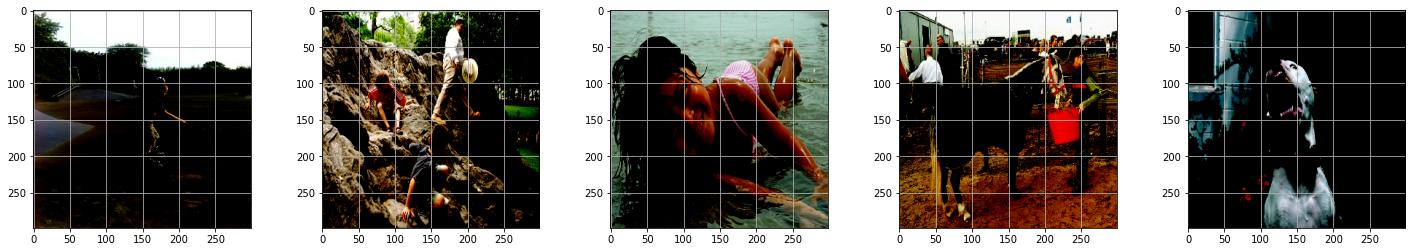

In [ ]:
# checking first five images post preprocessing

Display_Images = preprocessed_image[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(25)

for ax, image in zip(axes, Display_Images) :
  print('Shape after resize : ', image.shape)
  ax.imshow(image)
  ax.grid('off')

**5. Dataset creation**

In [ ]:

def load_images(image_path) :
  img = tf.io.read_file(image_path, name = None)
  img = tf.image.decode_jpeg(img, channels=0)
  img = tf.image.resize(img, IMAGE_SHAPE)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path

In [ ]:
all_img_vector

['/content/Images/1000268201_693b08cb0e.jpg',
 '/content/Images/1000268201_693b08cb0e.jpg',
 '/content/Images/1000268201_693b08cb0e.jpg',
 '/content/Images/1000268201_693b08cb0e.jpg',
 '/content/Images/1000268201_693b08cb0e.jpg',
 '/content/Images/1001773457_577c3a7d70.jpg',
 '/content/Images/1001773457_577c3a7d70.jpg',
 '/content/Images/1001773457_577c3a7d70.jpg',
 '/content/Images/1001773457_577c3a7d70.jpg',
 '/content/Images/1001773457_577c3a7d70.jpg',
 '/content/Images/1002674143_1b742ab4b8.jpg',
 '/content/Images/1002674143_1b742ab4b8.jpg',
 '/content/Images/1002674143_1b742ab4b8.jpg',
 '/content/Images/1002674143_1b742ab4b8.jpg',
 '/content/Images/1002674143_1b742ab4b8.jpg',
 '/content/Images/1003163366_44323f5815.jpg',
 '/content/Images/1003163366_44323f5815.jpg',
 '/content/Images/1003163366_44323f5815.jpg',
 '/content/Images/1003163366_44323f5815.jpg',
 '/content/Images/1003163366_44323f5815.jpg',
 '/content/Images/1007129816_e794419615.jpg',
 '/content/Images/1007129816_e7944

In [ ]:
# Map each image full path to the function, in order to preprocess the image

## sort the unique paths and store in a list
training_list = sorted(set(all_img_vector))

#create a new dataset from above training list
New_Img = tf.data.Dataset.from_tensor_slices(training_list)

#map load_images function across the elements of the new dataset above
New_Img = New_Img.map(load_images, num_parallel_calls = tf.data.experimental.AUTOTUNE)
#Note  : Here, num_parallel_calls = tf.data.experimental.AUTOTUNE sets the number of parallel calls dynamically.
            ## based on the current GPU/CPU

#setting a batch size of 64
New_Img = New_Img.batch(64, drop_remainder=False)
#Note : As we don't want to drop the last batch if it contains less than 64 elements, we set drop_remainder to false

In [ ]:
New_Img

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [ ]:
#Ratio = 80:20 and we will set random state = 42

path_train, path_test, caption_train, caption_test = train_test_split(all_img_vector, cap_vector, test_size = 0.2, random_state = 42)

In [ ]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


**Load the pretrained Imagenet weights of Inception net V3**

In [ ]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input #input of the image_model
hidden_layer = image_model.layers[-1].output  #the output of the image_model

#build the final model using both input & output layer
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [ ]:
# extract features from each image in the dataset

img_features = {}
for image, image_path in tqdm(New_Img) :
  # we are using tqdm for progress bar

  # feed images from newly created Dataset above to Inception V3 built above
  batch_features = image_features_extract_model(image)
  
  #squeeze out the features in a batch
  batch_features_flattened = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))

  for batch_feat, path in zip(batch_features_flattened, image_path) :
    feature_path = path.numpy().decode('utf-8')
    img_features[feature_path] = batch_feat.numpy()

100%|██████████| 127/127 [00:45<00:00,  2.82it/s]


In [ ]:
batch_features

<tf.Tensor: shape=(27, 8, 8, 2048), dtype=float32, numpy=
array([[[[0.00000000e+00, 7.76500031e-02, 0.00000000e+00, ...,
          2.31816277e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.07777871e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.93898663e-01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.85778394e-01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          9.43677947e-02, 0.00000000e+00, 5.05890131e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 4.22805876e-01, 1.35347582e-02, ...,
          2.33625740e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         

In [ ]:
batch_features_flattened

<tf.Tensor: shape=(27, 64, 2048), dtype=float32, numpy=
array([[[0.0000000e+00, 7.7650003e-02, 0.0000000e+00, ...,
         2.3181628e-01, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.0777787e-01, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.9389866e-01, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 1.8577839e-01],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 1.6571518e+00, 0.0000000e+00],
        [0.0000000e+00, 4.0259245e-01, 0.0000000e+00, ...,
         0.0000000e+00, 3.1797329e-01, 0.0000000e+00],
        [0.0000000e+00, 2.5346816e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.2507510e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 7.8292996e-02, ...,
         1.2065883e+00, 0.0000000e+00, 0.0000000e+00],
        [0.000000

In [ ]:
len(img_features)

8091

In [ ]:
batch_feat.shape

TensorShape([64, 2048])

In [ ]:
#view top five items of img_features dict
import more_itertools
top_5 = more_itertools.take(5, img_features.items())

top_5

[('/content/Images/1000268201_693b08cb0e.jpg',
  array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.16988818],
         [0.        , 0.        , 1.0106202 , ..., 0.        , 0.        ,
          0.06110416],
         ...,
         [0.        , 0.        , 2.037989  , ..., 1.2033163 , 0.        ,
          1.9922264 ],
         [0.        , 0.        , 0.9047285 , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 1.2529362 , 0.        , ..., 0.        , 0.        ,
          0.        ]], dtype=float32)),
 ('/content/Images/1001773457_577c3a7d70.jpg',
  array([[0.        , 0.664062  , 0.46306533, ..., 0.        , 0.        ,
          3.332647  ],
         [0.        , 1.227077  , 0.        , ..., 0.        , 0.25423333,
          3.329993  ],
         [1.2881067 , 1.5198954 , 0.        , ..., 0.4677731 , 0.36506143,
          3.817

In [ ]:
#to provide, both images along with the captions as input
def map(image_name, caption):
    img_tensor = img_features[image_name.decode('utf-8')]
    return img_tensor, caption

In [ ]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

BUFFER_SIZE = 1000
BATCH_SIZE = 64
def gen_dataset(img, capt):
    
    #create the dataset & transform it
    data = tf.data.Dataset.from_tensor_slices((img, capt))
    # dataset created using tf.data.Dataset.from_tensor_slices
    
    data = data.map(lambda ele1, ele2 : tf.numpy_function(map, [ele1, ele2], [tf.float32, tf.int32]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE)
    
     
    data = (data.shuffle(BUFFER_SIZE, reshuffle_each_iteration= True).batch(BATCH_SIZE, drop_remainder = False)
    .prefetch(tf.data.experimental.AUTOTUNE))
    # .prefetch() is used to prepare all upcoming elements, while current elements are being processed
    # We set reshuffle_each_iteration set to True in order to ensure different order per epoch
    # Also,  drop_remainder is set to False as we don't want to miss out any element if the last batch contains less than 64 elements

    return data

In [ ]:
train_dataset = gen_dataset(path_train,caption_train)
test_dataset = gen_dataset(path_test,caption_test)

In [ ]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 31)


**6. Model Building**

In [ ]:
# Setting  parameters

embedding_dim = 256 
units = 512

#top 5,000 words +1
vocab_size = 5001
train_num_steps = len(path_train) // BATCH_SIZE #len(total train images) // BATCH_SIZE
test_num_steps = len(path_test) // BATCH_SIZE  #len(total test images) // BATCH_SIZE

max_length = 31
feature_shape = batch_feat.shape[1]
attention_feature_shape = batch_feat.shape[0]

**Encoder (CNN)**

In [ ]:
tf.compat.v1.reset_default_graph()
print(tf.compat.v1.get_default_graph())

In [ ]:
#Building Encoder using CNN Keras subclassing method

class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features =  tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)
        return features

In [ ]:
encoder=Encoder(embedding_dim)

**Attention model**

In [ ]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) #build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1) #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        # features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)

        # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        hidden_with_time_axis = hidden[:, tf.newaxis]

        # build your score funciton to shape: (batch_size, 8*8, units)
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))  

        # extract your attention weights with shape: (batch_size, 8*8, 1)
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1) 

        #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = attention_weights * features 

        # reduce the shape to (batch_size, embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)  
        
        return context_vector, attention_weights

**Decoder**

In [ ]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        return output, state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [ ]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [ ]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


**7. Model training & optimization**

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)  #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.NONE) #define your loss object

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    #loss is getting multiplied with mask to get an ideal shape
    
    return tf.reduce_mean(loss_)

In [ ]:
checkpoint_path = "Flickr8K/checkpoint1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [ ]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [ ]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        #the training steps
        encoder_op = encoder(img_tensor)

        #apply teacher forcing by passing target word as next input to the decoder
        for r in range(1, target.shape[1]) :
          #pass encoder_op to decoder
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions) 
          dec_input = tf.expand_dims(target[:, r], 1)  

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) # calculating gradient wrt each trainable var

    #we will now compute the gradients and apply it to the optimizer while backpropagating
    optimizer.apply_gradients(zip(grad, trainable_vars))

    return loss, avg_loss

In [ ]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    
    #write your code here to do the testing steps
    hidden = decoder.init_state(batch_size = target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
      encoder_op = encoder(img_tensor)

      #apply teacher forcing again
      for r in range(1, target.shape[1]) :
        #pass encoder_op to decoder
        predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
        loss = loss + loss_function(target[:, r], predictions)

        dec_input = tf.expand_dims(target[: , r], 1)

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) # calculating gradient wrt each trainable var

    #we will now compute the gradients and apply it to the optimizer while backpropagating
    optimizer.apply_gradients(zip(grad, trainable_vars))                      


    return loss, avg_loss

In [ ]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
      batch_loss, t_loss = test_step(img_tensor, target)
      total_loss = total_loss + t_loss
      avg_test_loss = total_loss/ test_num_steps

    return avg_test_loss

In [ ]:
loss_plot = []
test_loss_plot = []
EPOCHS = 30

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/30 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.439, & test loss is 1.206
Time taken for 1 epoch 170.0978820323944 sec

Test loss has been reduced from 100.000 to 1.206


  7%|▋         | 2/30 [03:58<51:26, 110.24s/it]  

For epoch: 2, the train loss is 1.115, & test loss is 1.061
Time taken for 1 epoch 67.92238330841064 sec

Test loss has been reduced from 1.206 to 1.061
For epoch: 3, the train loss is 1.009, & test loss is 0.977
Time taken for 1 epoch 67.87120604515076 sec

Test loss has been reduced from 1.061 to 0.977


 13%|█▎        | 4/30 [06:14<35:29, 81.90s/it]

For epoch: 4, the train loss is 0.936, & test loss is 0.909
Time taken for 1 epoch 67.76112794876099 sec

Test loss has been reduced from 0.977 to 0.909
For epoch: 5, the train loss is 0.876, & test loss is 0.849
Time taken for 1 epoch 67.78223037719727 sec

Test loss has been reduced from 0.909 to 0.849


 17%|█▋        | 5/30 [07:22<32:01, 76.88s/it]

For epoch: 6, the train loss is 0.823, & test loss is 0.804
Time taken for 1 epoch 67.76073932647705 sec

Test loss has been reduced from 0.849 to 0.804


 20%|██        | 6/30 [08:30<29:32, 73.86s/it]

For epoch: 7, the train loss is 0.775, & test loss is 0.756
Time taken for 1 epoch 67.6379029750824 sec

Test loss has been reduced from 0.804 to 0.756


 27%|██▋       | 8/30 [10:46<25:53, 70.60s/it]

For epoch: 8, the train loss is 0.731, & test loss is 0.714
Time taken for 1 epoch 67.61431097984314 sec

Test loss has been reduced from 0.756 to 0.714
For epoch: 9, the train loss is 0.692, & test loss is 0.671
Time taken for 1 epoch 67.60117363929749 sec

Test loss has been reduced from 0.714 to 0.671


 30%|███       | 9/30 [11:54<24:24, 69.73s/it]

For epoch: 10, the train loss is 0.653, & test loss is 0.634
Time taken for 1 epoch 67.62625026702881 sec

Test loss has been reduced from 0.671 to 0.634


 37%|███▋      | 11/30 [14:09<21:45, 68.70s/it]

For epoch: 11, the train loss is 0.617, & test loss is 0.600
Time taken for 1 epoch 67.49702715873718 sec

Test loss has been reduced from 0.634 to 0.600
For epoch: 12, the train loss is 0.584, & test loss is 0.566
Time taken for 1 epoch 67.55278611183167 sec

Test loss has been reduced from 0.600 to 0.566


 40%|████      | 12/30 [15:17<20:31, 68.42s/it]

For epoch: 13, the train loss is 0.555, & test loss is 0.537
Time taken for 1 epoch 67.52694654464722 sec

Test loss has been reduced from 0.566 to 0.537


 47%|████▋     | 14/30 [17:32<18:08, 68.04s/it]

For epoch: 14, the train loss is 0.527, & test loss is 0.509
Time taken for 1 epoch 67.43474268913269 sec

Test loss has been reduced from 0.537 to 0.509


 50%|█████     | 15/30 [18:40<16:58, 67.92s/it]

For epoch: 15, the train loss is 0.501, & test loss is 0.486
Time taken for 1 epoch 67.42507314682007 sec

Test loss has been reduced from 0.509 to 0.486
For epoch: 16, the train loss is 0.477, & test loss is 0.460
Time taken for 1 epoch 67.53311944007874 sec

Test loss has been reduced from 0.486 to 0.460


 57%|█████▋    | 17/30 [20:55<14:41, 67.77s/it]

For epoch: 17, the train loss is 0.455, & test loss is 0.441
Time taken for 1 epoch 67.36982369422913 sec

Test loss has been reduced from 0.460 to 0.441
For epoch: 18, the train loss is 0.434, & test loss is 0.420
Time taken for 1 epoch 67.37320923805237 sec

Test loss has been reduced from 0.441 to 0.420


 60%|██████    | 18/30 [22:03<13:32, 67.72s/it]

For epoch: 19, the train loss is 0.418, & test loss is 0.405
Time taken for 1 epoch 67.39419078826904 sec

Test loss has been reduced from 0.420 to 0.405


 63%|██████▎   | 19/30 [23:10<12:24, 67.68s/it]

For epoch: 20, the train loss is 0.404, & test loss is 0.393
Time taken for 1 epoch 67.48832368850708 sec

Test loss has been reduced from 0.405 to 0.393


 67%|██████▋   | 20/30 [24:18<11:16, 67.69s/it]

For epoch: 21, the train loss is 0.385, & test loss is 0.372
Time taken for 1 epoch 67.65955662727356 sec

Test loss has been reduced from 0.393 to 0.372


 73%|███████▎  | 22/30 [26:34<09:01, 67.70s/it]

For epoch: 22, the train loss is 0.367, & test loss is 0.359
Time taken for 1 epoch 67.38666081428528 sec

Test loss has been reduced from 0.372 to 0.359
For epoch: 23, the train loss is 0.357, & test loss is 0.346
Time taken for 1 epoch 67.42841410636902 sec

Test loss has been reduced from 0.359 to 0.346


 77%|███████▋  | 23/30 [27:41<07:53, 67.69s/it]

For epoch: 24, the train loss is 0.344, & test loss is 0.334
Time taken for 1 epoch 67.41509890556335 sec

Test loss has been reduced from 0.346 to 0.334


 83%|████████▎ | 25/30 [29:56<05:38, 67.62s/it]

For epoch: 25, the train loss is 0.332, & test loss is 0.325
Time taken for 1 epoch 67.31582736968994 sec

Test loss has been reduced from 0.334 to 0.325
For epoch: 26, the train loss is 0.322, & test loss is 0.311
Time taken for 1 epoch 67.39522814750671 sec

Test loss has been reduced from 0.325 to 0.311


 87%|████████▋ | 26/30 [31:04<04:30, 67.62s/it]

For epoch: 27, the train loss is 0.310, & test loss is 0.298
Time taken for 1 epoch 67.3520097732544 sec

Test loss has been reduced from 0.311 to 0.298


 90%|█████████ | 27/30 [32:11<03:22, 67.60s/it]

For epoch: 28, the train loss is 0.300, & test loss is 0.291
Time taken for 1 epoch 67.37815880775452 sec

Test loss has been reduced from 0.298 to 0.291


 93%|█████████▎| 28/30 [33:19<02:15, 67.60s/it]

For epoch: 29, the train loss is 0.296, & test loss is 0.288
Time taken for 1 epoch 67.38291144371033 sec

Test loss has been reduced from 0.291 to 0.288


100%|██████████| 30/30 [35:34<00:00, 71.16s/it]

For epoch: 30, the train loss is 0.286, & test loss is 0.276
Time taken for 1 epoch 67.50514149665833 sec

Test loss has been reduced from 0.288 to 0.276


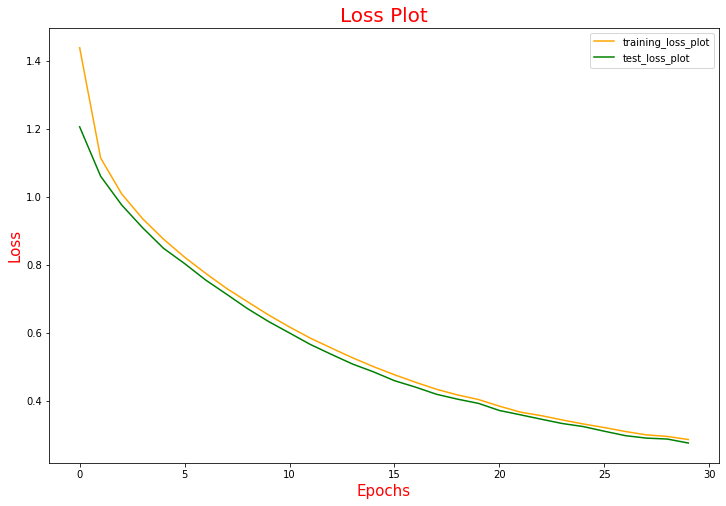

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8))
plt.plot(loss_plot, color='orange', label = 'training_loss_plot')
plt.plot(test_loss_plot, color='green', label = 'test_loss_plot')
plt.xlabel('Epochs', fontsize = 15, color = 'red')
plt.ylabel('Loss', fontsize = 15, color = 'red')
plt.title('Loss Plot', fontsize = 20, color = 'red')
plt.legend()
plt.show()

**8. Model Evaluation**

In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_feature_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_images(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder (img_tensor_val) # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) # get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() #extract the predicted id(embedded value) which carries the max value
        #map the id to the word from tokenizer and append the value to the result list
        result.append (tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

In [ ]:
def plot_attention_map (caption, weights, image) :

  fig = plt.figure(figsize = (10, 10))
  temp_img = np.array(Image.open(image))

  cap_len = len(caption)
  for cap in range(cap_len) :
    weights_img = np.reshape(weights[cap], (8,8))
    wweights_img = np.array(Image.fromarray(weights_img).resize((224,224), Image.LANCZOS))

    ax = fig.add_subplot(cap_len//2, cap_len//2, cap+1)
    ax.set_title(caption[cap], fontsize = 14, color = 'red')

    img = ax.imshow(temp_img)

    ax.imshow(weights_img, cmap='gist_heat', alpha=0.6, extent=img.get_extent())
    ax.axis('off')
  plt.subplots_adjust(hspace=0.2, wspace=0.2)
  plt.show()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [ ]:
image_test = path_test.copy()

In [ ]:
def pred_caption_audio(random, autoplay=False, weights=(0.5, 0.5, 0, 0)) :

    cap_test_data = caption_test.copy()
    rid = np.random.randint(0, random)
    test_image = image_test[rid]
    #test_image = './images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test_data[rid] if i not in [0]])
    result, attention_plot, pred_test = evaluate(test_image)


    real_caption=filt_text(real_caption)      


    pred_caption=' '.join(result).rsplit(' ', 1)[0]


    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights=weights)#set your weights
    print(f"BELU score: {score*100}")
    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attention_map(result, attention_plot, test_image)

    # we will make use of Google Text to Speech API (online), which will convert the caption to audio
    speech = gTTS('Predicted Caption : ' + pred_caption, lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'

    display.display(display.Audio(audio_file, rate = None, autoplay = autoplay))

    return test_image

**Test Images**

**Test Image 1**

BELU score: 60.23977622898388
Real Caption: the beautiful reddish dog UNK around the flat snowy street with snowball in its mouth
Prediction Caption: the beautiful reddish dog runs on snow with snowball in its mouth


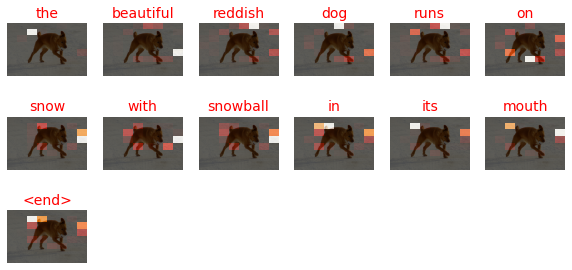

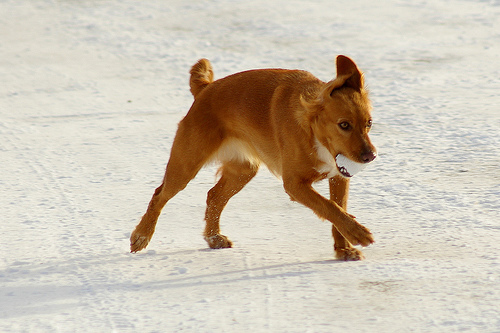

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

**Test Image 2**

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 71.06871831376344
Real Caption: two white dogs playing in forest
Prediction Caption: two white dogs is rolling in forest


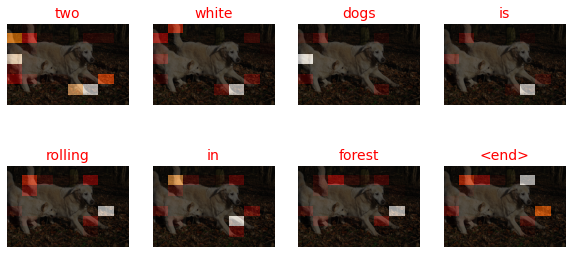

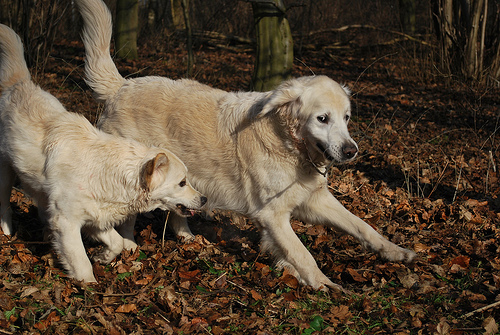

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

**Test Image 3**

BELU score: 33.97582547691857
Real Caption: middle eastern woman wearing green is sitting on stone step holding box of cigarettes
Prediction Caption: middle eastern woman wearing the woman in red wearing public park


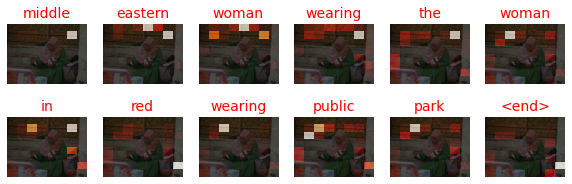

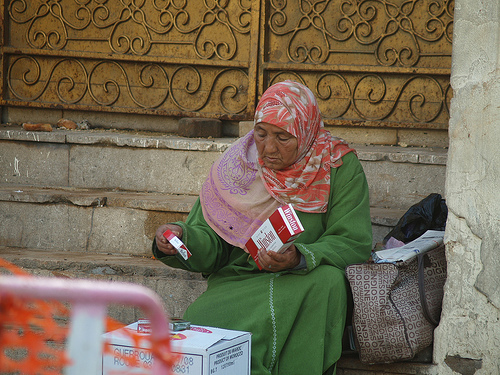

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

**Test Image 4**

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 34.95247278626476
Real Caption: person snowboarding at ski slope
Prediction Caption: man on ski


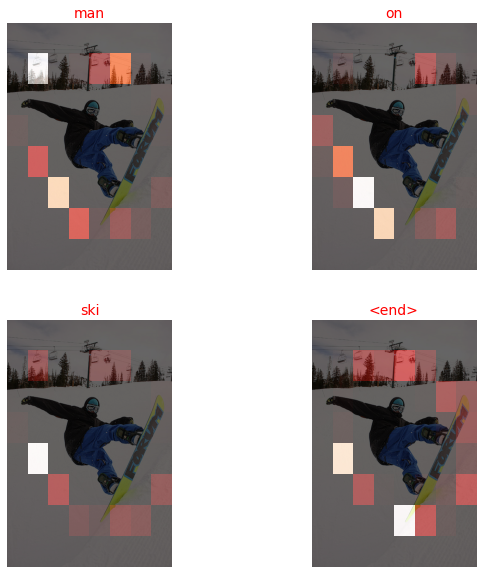

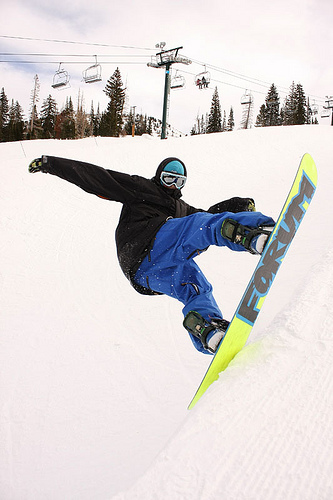

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.35, 0.25, 0, 0))
Image.open(test_image)

**Test Image 5**

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 29.97762379232956
Real Caption: the young dancer marches in the parade
Prediction Caption: girl kicking inside the music


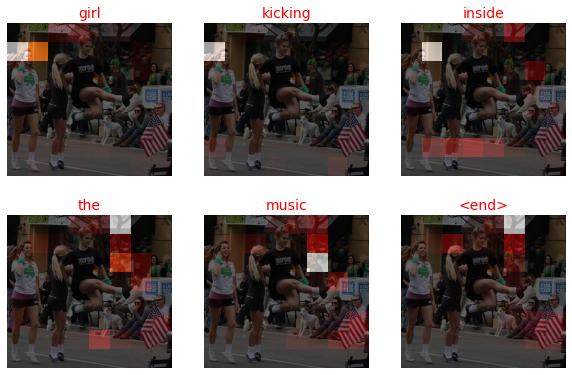

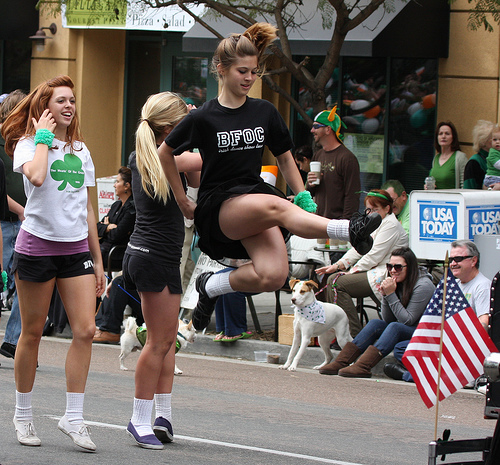

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.5, 0, 0))
Image.open(test_image)

**Test Image 6**

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 39.54596950007842
Real Caption: three tan and brown dogs are running over grass
Prediction Caption: three dogs run through grass


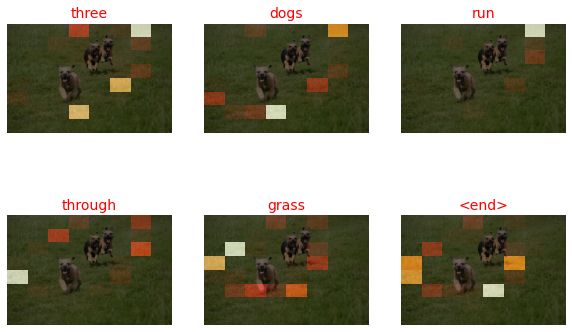

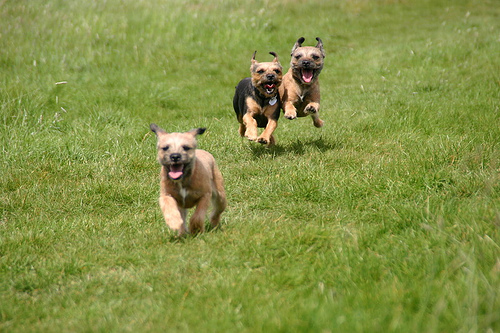

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.25, 0.25, 0, 0))
Image.open(test_image)

**Insights and Conclusion**

1. We experimented with multiple other weights (12-15 different combinations) but found the best results mainly for the below :

1. (0.5, 0.5 , 0, 0)

2. (0.5, 0.25 , 0, 0)

3. (0.25, 0.25 , 0, 0)

4. (0.25, 0.35 , 0, 0)

The probability of getting a lower Bleu (less than 50%) score was least for the above weights.

We achieved more than 70% accuracy for majority of the test images using above weights.

We also got an accuracy of 100% multiple time using weights : (0.5, 0.5 , 0, 0), (0.5, 0.25, 0, 0) and (0.25, 0.5, 0, 0)